In [22]:
import os
import time 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns

In [4]:
plt.tight_layout()
sns.set_style("darkgrid")

<Figure size 640x480 with 0 Axes>

Reading the Dataset

In [5]:
data = pd.read_csv("./Projects/loan_default_predictor/input/train.csv")

In [6]:
data["year"].unique()

array([2019])

In [7]:
data.head(10)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
2,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
3,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
4,24896,2019,cf,Joint,pre,type1,p3,l1,nopc,nob/c,...,EXP,860,EXP,55-64,to_inst,79.109589,North,direct,0,44.0
5,24897,2019,NaN,Female,nopre,type1,p4,l1,nopc,nob/c,...,CIB,863,CIB,55-64,to_inst,86.525974,North,direct,0,42.0
6,24898,2019,cf,Joint,nopre,type1,p3,l1,nopc,nob/c,...,CIB,580,EXP,55-64,to_inst,78.765690,central,direct,0,44.0
7,24899,2019,cf,Sex Not Available,nopre,type3,p3,l1,nopc,nob/c,...,CIB,788,EXP,55-64,to_inst,63.444767,south,direct,0,30.0
8,24900,2019,cf,Male,nopre,type2,p3,l2,nopc,b/c,...,EXP,723,CIB,55-64,to_inst,81.250000,North,direct,1,44.0
9,24901,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,EXP,501,EXP,35-44,to_inst,65.889831,south,direct,0,36.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118936 entries, 0 to 118935
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         118936 non-null  int64  
 1   year                       118936 non-null  int64  
 2   loan_limit                 116297 non-null  object 
 3   Gender                     118936 non-null  object 
 4   approv_in_adv              118208 non-null  object 
 5   loan_type                  118936 non-null  object 
 6   loan_purpose               118823 non-null  object 
 7   Credit_Worthiness          118936 non-null  object 
 8   open_credit                118936 non-null  object 
 9   business_or_commercial     118936 non-null  object 
 10  loan_amount                118936 non-null  int64  
 11  rate_of_interest           89735 non-null   float64
 12  Interest_rate_spread       89575 non-null   float64
 13  Upfront_charges            87

*Dropping uninformative columns*

In [9]:
data.drop(labels=["ID","year"],axis=1,inplace=True)

In [37]:
data.drop(labels=["term_bins"],axis=1,inplace=True)

Getting statistics of numerical features

In [10]:
data.describe()

,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,1.189360e+05,89735.000000,89575.000000,87179.000000,118900.000000,1.068360e+05,111638.000000,118936.000000,106836.000000,118936.000000,99641.000000
mean,3.313594e+05,4.045496,0.441961,3221.605902,335.161505,4.986317e+05,6961.795625,700.022222,72.754262,0.246864,37.742616
std,1.845168e+05,0.560807,0.512584,3247.736026,58.377235,3.630046e+05,6621.782547,115.831828,42.782047,0.431189,10.548719
min,1.650000e+04,2.125000,-1.084100,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,1.965000e+05,3.625000,0.076550,577.210000,360.000000,2.680000e+05,3720.000000,600.000000,60.416667,0.000000,31.000000
50%,2.965000e+05,3.990000,0.392000,2596.950000,360.000000,4.180000e+05,5760.000000,700.000000,75.135870,0.000000,39.000000
75%,4.365000e+05,4.375000,0.774650,4812.500000,360.000000,6.280000e+05,8520.000000,801.000000,86.184211,0.000000,45.000000
max,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


Getting categorical features description

In [11]:
data.describe(include=object)

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
count,116297,118936,118208,118936,118823,118936,118936,118936,118838,118936,...,118936,118936,118936,118936,118936,118936,118776,118776,118936,118936
unique,2,4,2,3,4,2,2,2,2,2,...,2,3,2,4,4,2,7,2,4,2
top,cf,Male,nopre,type1,p3,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CIB,EXP,45-54,to_inst,North,direct
freq,108369,33902,99657,90613,44771,113873,118481,102241,106676,113253,...,118910,110548,118910,117167,38428,59499,27767,76651,59755,118910


In [15]:
def plot_numerical_cols_hists(data):
    num_columns = list(data.select_dtypes(exclude=[object]).columns)
    ncols = 3
    nrows = len(num_columns) // ncols + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15.6,12.8))
    for idx,column in enumerate(num_columns):
        col = idx // axes.shape[0]
        row = idx % axes.shape[0]
        ax = axes[row,col]
        sns.histplot(data=data, x=column, ax=ax)
    fig.savefig("/teamspace/studios/this_studio/Projects/loan_default_predictor/reports/eda/num_hists.png")
    plt.close(fig)

In [35]:
def num_cols_box_plot(data):
    num_columns = list(data.select_dtypes(exclude=[object]).columns)
    ncols = 3
    nrows = len(num_columns) // ncols + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15.6,12.8))
    for idx,column in enumerate(num_columns):
        col = idx // axes.shape[0]
        row = idx % axes.shape[0]
        ax = axes[row,col]
        sns.boxplot(data=data, x=data[column], ax=ax)
    fig.savefig("/teamspace/studios/this_studio/Projects/loan_default_predictor/reports/eda/visuals/num_boxes.png")
    plt.close(fig)

In [43]:
cat_cols = list(data.select_dtypes(include=object).columns)

In [48]:
cat_cols

['loan_limit',
 'Gender',
 'approv_in_adv',
 'loan_type',
 'loan_purpose',
 'Credit_Worthiness',
 'open_credit',
 'business_or_commercial',
 'Neg_ammortization',
 'interest_only',
 'lump_sum_payment',
 'construction_type',
 'occupancy_type',
 'Secured_by',
 'total_units',
 'credit_type',
 'co-applicant_credit_type',
 'age',
 'submission_of_application',
 'Region',
 'Security_Type']

In [45]:
def plot_cats_bars(data):
    cat_cols = list(data.select_dtypes(include=object).columns)
    ncols = 3
    nrows = len(cat_cols) // ncols + 1
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15.6,12.8))
    for idx,column in enumerate(cat_cols):
        col = idx // axes.shape[0]
        row = idx % axes.shape[0]
        ax = axes[row,col]
        sns.catplot(data=data, x=column, ax=ax,kind="bar")
    fig.savefig("/teamspace/studios/this_studio/Projects/loan_default_predictor/reports/eda/visuals/cat_bars.png")
    plt.close(fig)

In [38]:
num_cols_box_plot(data=data)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/seaborn/categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


TypeError: Horizontal orientation requires numeric `x` variable.

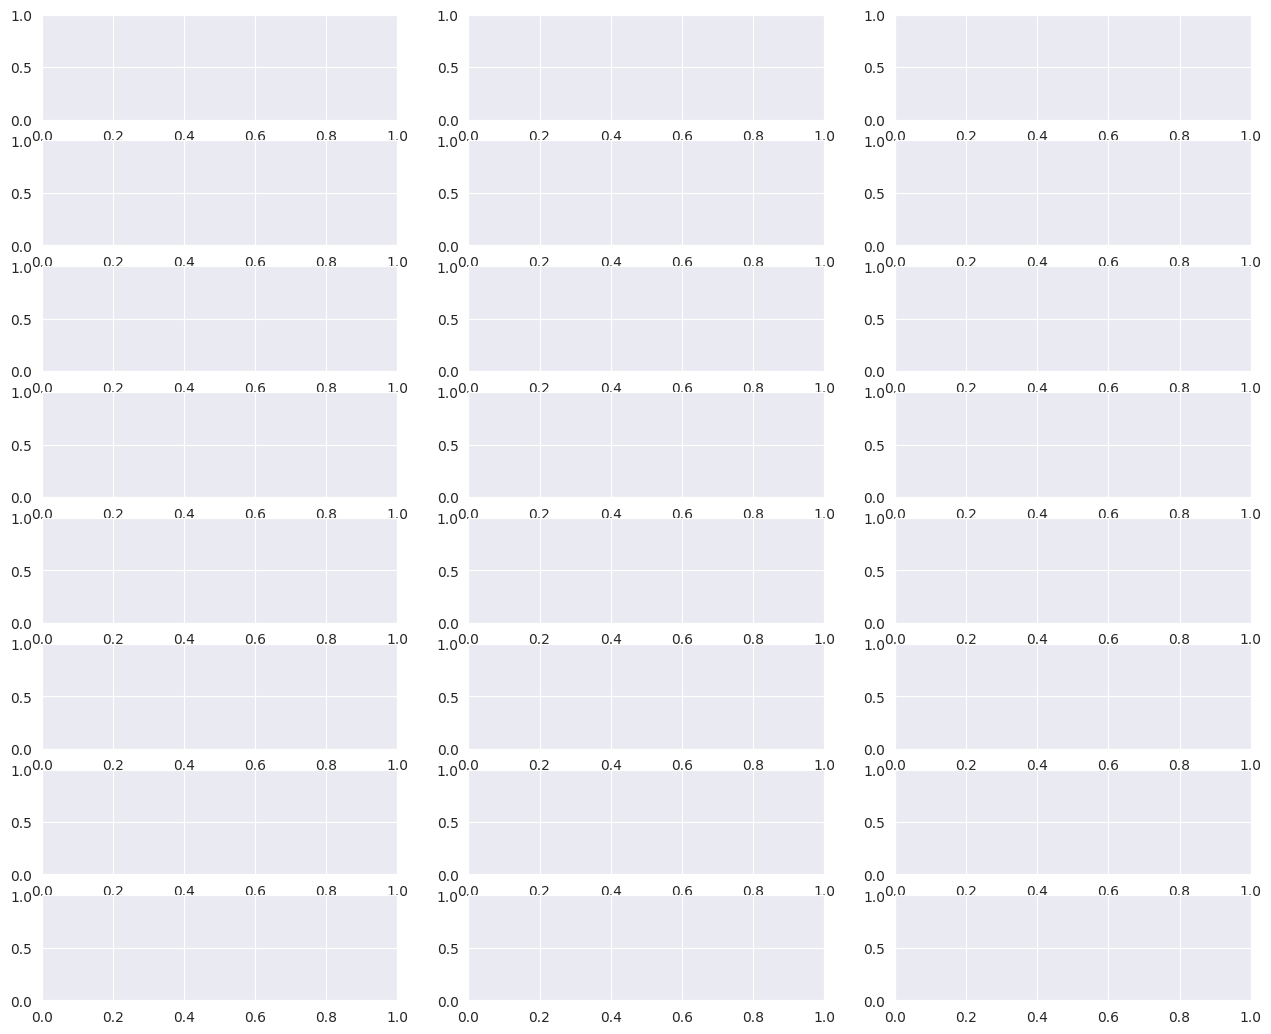

In [46]:
plot_cats_bars(data)

In [1]:
from gradio_client import Client

client = Client("Muhammad7777/new_space2")
result = client.predict(
		"Hello!!",	# str  in 'name' Textbox component
		api_name="/predict"
)
print(result)

Loaded as API: https://muhammad7777-new-space2.hf.space ✔
Hello Hello!!!!
